<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/pd4_um_uw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_true=[0]*50
for i in range(50):
  if i%5!=0:
    coef_true[i]=0
  elif i==0:
    coef_true[i]=random.uniform(0,1)
  elif i%10==0:
    coef_true[i]=random.uniform(0,1)
  else:
    coef_true[i]=random.uniform(1,2)
coef_true=np.array(coef_true)



In [ ]:
print("pupa")

pupa


In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LassoCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def artif_data_sc():
  matr=[0]*1000
  for i in range(1000):
    matr[i]=[random.uniform(0,i+1) for j in range(50)]
    matr[i][0] = 1
  y_true = np.dot(matr, coef_true)
  y_true = y_true + np.random.normal(0, 2, len(y_true))
  df = pd.DataFrame(matr)
  df.columns = [f"x{i}" for i in range(df.shape[1])]
  df["y"] = y_true

  df_sc = StandardScaler().fit_transform(df)
  df_sc = pd.DataFrame(df_sc, columns=df.columns)

  return [df_sc.iloc[:,:-1], df_sc.iloc[:,-1]]


In [ ]:
y_true = artif_data_sc()[1]
y_true

,y
0,-1.590177
1,-1.589360
2,-1.585689
3,-1.575239
4,-1.575599
...,...
995,0.711606
996,2.586008
997,2.038809
998,2.777446


In [104]:

alphas=np.logspace(-3, 8, 40)
MSE_las=[[0 for i in range(2)] for j in range(len(alphas))]
MSE_l2=[[0 for i in range(2)] for j in range(len(alphas))]
#biases_las=[[0 for i in range(10)] for j in range(len(alphas))]
#biases_l2=[[0 for i in range(10)]  for j in range(len(alphas))]
variances_las=[[0 for i in range(2)]  for j in range(len(alphas))]
variances_l2=[[0 for i in range(2)]  for j in range(len(alphas))]

bias2_las=[0  for j in range(len(alphas))]
bias2_l2=[0   for j in range(len(alphas))]
var_las=[0   for j in range(len(alphas))]
var_l2=[0 for j in range(len(alphas))]
MSE_lasso=[0 for j in range(len(alphas))]
MSE_ridge=[0 for j in range(len(alphas))]


for j in range(len(alphas)):
  predictions = []
  for i in range(2):

    matr  = artif_data_sc()[0]
    y_true = artif_data_sc()[1]
    X_train, X_test, y_train, y_test = train_test_split(matr, y_true, test_size=0.2, random_state=42)

    las_mod=Lasso(alpha=alphas[j]).fit(X_train, y_train)
    y_las_pred= las_mod.predict(X_test)

    l2_mod=Ridge(alpha=alphas[j]).fit(X_train, y_train)
    y_l2_pred= l2_mod.predict(X_test)

    #y_las_mean_pred = np.mean(y_las_pred)
    #y_l2_mean_pred = np.mean(y_l2_pred)


    MSE_l2[j][i] = mean_squared_error(y_test, y_l2_pred)
    MSE_las[j][i] = mean_squared_error(y_test, y_las_pred)

    variances_las[j][i]=np.var(y_las_pred)
    variances_l2[j][i]=np.var(y_l2_pred)
  print(MSE_l2[j])

  var_las[j] = np.mean(variances_las[j])
  var_l2[j] = np.mean( variances_l2[j])
  MSE_lasso[j]=np.mean(MSE_las[j])
  MSE_ridge[j]=np.mean(MSE_l2[j])



[0.1814225092998123, 0.22593762814224155]
[0.18859988928214202, 0.2140080785842732]
[0.1607482144380875, 0.16580377831894227]
[0.18606353261790617, 0.17870499667149695]
[0.2045320213266097, 0.14719968211868908]
[0.21450665591581405, 0.19527413812995217]
[0.19320378255725174, 0.19553151476945874]
[0.17721276244110362, 0.15501413451489737]
[0.2094053579268161, 0.25307511667369526]
[0.22165840780549675, 0.20894048109217853]
[0.20120926145658358, 0.17107614063767917]
[0.17354889771611795, 0.20021271857205647]
[0.15093181360831787, 0.25745751010321727]
[0.1835755562618668, 0.17524700413425648]
[0.1711027336201558, 0.16717309554723805]
[0.19005284016147564, 0.16168348018331963]
[0.17293862042689107, 0.24826488344487352]
[0.1794268538107089, 0.20208411614752714]
[0.1916707851194724, 0.18617127079758278]
[0.18228457398792172, 0.1949378259583503]
[0.15005961891813, 0.2099207248061444]
[0.16410368642801784, 0.1647118922565984]
[0.16015577174469, 0.16505017448809983]
[0.15123970459982375, 0.18342

In [105]:
bias2_las=np.subtract(MSE_lasso,var_las)
bias2_l2= np.subtract(MSE_ridge, var_l2)

In [ ]:
len(bias2_l2), len(bias2_las), len(var_l2), len(var_las)

(40, 40, 40, 40)

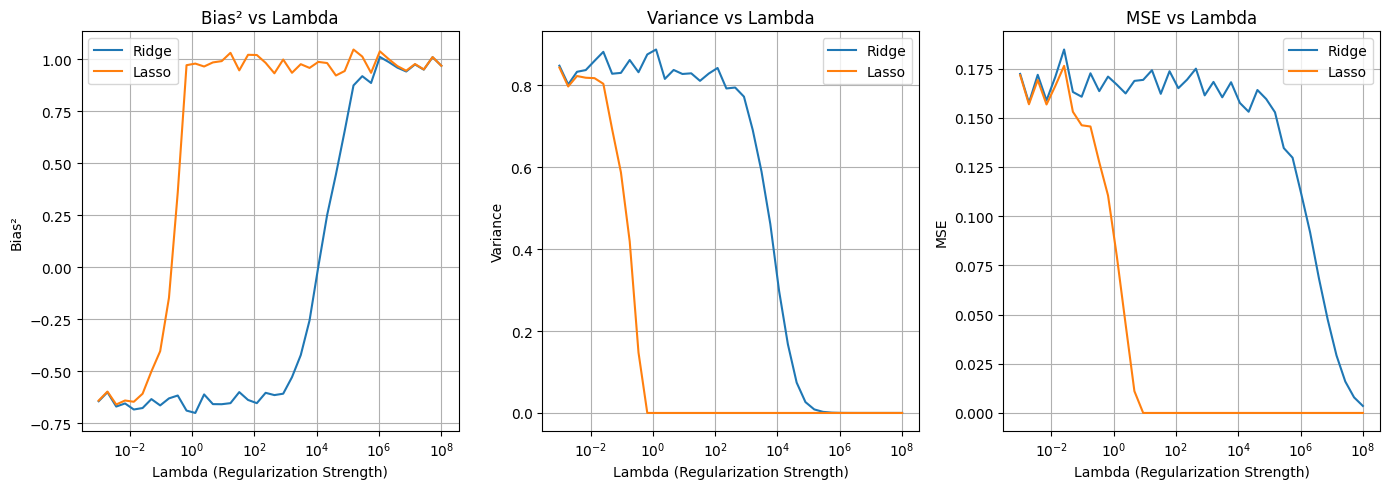

In [106]:
def plot_metric(metric_ridge, metric_lasso, title, ylabel):
    plt.plot(alphas, metric_ridge, label='Ridge')
    plt.plot(alphas, metric_lasso, label='Lasso')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)


plt.rcParams["figure.figsize"] = (14,5)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 3, 1)
plot_metric(bias2_l2, bias2_las, 'Bias² vs Lambda', 'Bias²')

plt.subplot(1, 3, 2)
plot_metric(var_l2, var_las, 'Variance vs Lambda', 'Variance')

plt.subplot(1, 3, 3)
plot_metric(mse_l2, mse_las, 'MSE vs Lambda', 'MSE')

plt.tight_layout()
plt.show()